# Query Answering Machine 

Our proposed approach for facial age detection is to use a combination of feature extraction techniques, including Local Binary Pattern (LBP), Scale-Invariant Feature Transform (SIFT), and Oriented FAST and Rotated BRIEF (ORB), with the K-Nearest Neighbor (KNN) algorithm. We will evaluate the accuracy of each feature extraction technique and their combination to determine their effectiveness in capturing the relevant features for age detection.

In addition, we will also investigate the use of Random Forest to further improve the accuracy of our model. By comparing the accuracy of Random Forest with our current approach, we can determine if it provides any additional benefit to our age detection task.

### Using LBP features

Local Binary Pattern (LBP) features are effective in facial age detection because they capture the texture and pattern information from facial images. It extract information about the local variations in an image by comparing the intensity values of a central pixel with its neighboring pixels.

#### K-NN 

In [116]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier using only LBP features
classifier.fit(LBP_features_train, Y_train)

# Make predictions using only LBP features and evaluate the accuracy on the testing set
Y_pred_test = classifier.predict(LBP_features_test)
accuracy_test = accuracy_score(Y_test, Y_pred_test)
print(f"Accuracy score on testing set using only LBP features: {accuracy_test:.2f}")

# Make predictions using only LBP features and evaluate the accuracy on the training set
Y_pred_train = classifier.predict(LBP_features_train)
accuracy_train = accuracy_score(Y_train, Y_pred_train)
print(f"Accuracy score on training set using only LBP features: {accuracy_train:.2f}")

Accuracy score on testing set using only LBP features: 0.35
Accuracy score on training set using only LBP features: 0.57


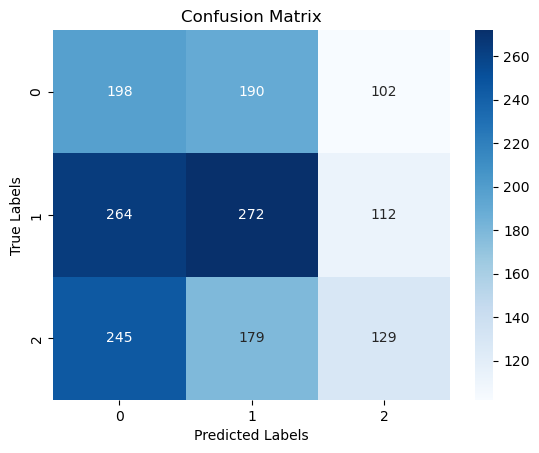

In [117]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
# Generate the confusion matrix for the testing set
cm = confusion_matrix(Y_test, Y_pred_test)

# Plot the confusion matrix using Seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

It's worth noting that in this specific problem, the training and testing scores are very similar. K-Nearest Neighbors (KNN) is a type of instance-based learning algorithm that classifies new examples based on their similarity to training examples. 

When the differences between classes are subtle, KNN can be less effective than other algorithms. In such cases, it may be worth exploring other approaches, such as Random Forest, which is better suited for larger datasets with many features and can achieve better performance than KNN. 

#### Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=20, random_state=99)

# Train the classifier on the ORB features of the training set
clf.fit(LBP_features_train, Y_train)

# Make predictions using only LBP features and evaluate the accuracy on the testing set
Y_pred_test = clf.predict(LBP_features_test)
accuracy_test = accuracy_score(Y_test, Y_pred_test)
print(f"Accuracy score on testing set using only LBP features: {accuracy_test:.2f}")

# Make predictions using only LBP features and evaluate the accuracy on the training set
Y_pred_train = clf.predict(LBP_features_train)
accuracy_train = accuracy_score(Y_train, Y_pred_train)
print(f"Accuracy score on training set using only LBP features: {accuracy_train:.2f}")

Accuracy score on testing set using only LBP features: 0.37
Accuracy score on training set using only LBP features: 1.00


In [119]:
# Create a Random Forest classifier
clf = RandomForestClassifier(max_depth=15, n_estimators=20, random_state=99, max_features=0.7,max_samples=0.65)

# Train the classifier on the ORB features of the training set
clf.fit(LBP_features_train, Y_train)

# Make predictions using only LBP features and evaluate the accuracy on the testing set
Y_pred_test = clf.predict(LBP_features_test)
accuracy_test = accuracy_score(Y_test, Y_pred_test)
print(f"Accuracy score on testing set using only LBP features: {accuracy_test:.2f}")

# Make predictions using only LBP features and evaluate the accuracy on the training set
Y_pred_train = clf.predict(LBP_features_train)
accuracy_train = accuracy_score(Y_train, Y_pred_train)
print(f"Accuracy score on training set using only LBP features: {accuracy_train:.2f}")

Accuracy score on testing set using only LBP features: 0.38
Accuracy score on training set using only LBP features: 0.92


We try the Random Forest with different parameters to see if there's any change in accuracy. And this is the best we could do for the testing set. 

### Using ORB features

#### KNN 

In [120]:
# Initialize the KNN classifier
classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier using only ORB features
classifier.fit(ORB_features_train, Y_train)

# Make predictions using only ORB features and evaluate the accuracy on the testing set
Y_pred_test = classifier.predict(ORB_features_test)
accuracy_test = accuracy_score(Y_test, Y_pred_test)
print(f"Accuracy score on testing set using only ORB features: {accuracy_test:.2f}")

# Make predictions using only ORB features and evaluate the accuracy on the training set
Y_pred_train = classifier.predict(ORB_features_train)
accuracy_train = accuracy_score(Y_train, Y_pred_train)
print(f"Accuracy score on training set using only ORB features: {accuracy_train:.2f}")

Accuracy score on testing set using only ORB features: 0.36
Accuracy score on training set using only ORB features: 0.58


We see that it's a similar case when using KNN with ORB features too.

#### Random Forest

In [121]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=99)

# Train the classifier on the ORB features of the training set
clf.fit(ORB_features_train, Y_train)

# Make predictions using only ORB features and evaluate the accuracy on the testing set
Y_pred_test = clf.predict(ORB_features_test)
accuracy_test = accuracy_score(Y_test, Y_pred_test)
print(f"Accuracy score on testing set using only ORB features: {accuracy_test:.2f}")

# Make predictions using only ORB features and evaluate the accuracy on the training set
Y_pred_train = clf.predict(ORB_features_train)
accuracy_train = accuracy_score(Y_train, Y_pred_train)
print(f"Accuracy score on training set using only ORB features: {accuracy_train:.2f}")

Accuracy score on testing set using only ORB features: 0.39
Accuracy score on training set using only ORB features: 1.00


We can see that the two featuers LBP and ORB yeild similar results.

### SIFT

Let us look at SIFT just for the sake of it.

#### KNN

In [122]:
# Initialize the KNN classifier
classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier using only SIFT features
classifier.fit(SIFT_features_train, Y_train)

# Make predictions using only SIFT features and evaluate the accuracy on the testing set
Y_pred_test = classifier.predict(SIFT_features_test)
accuracy_test = accuracy_score(Y_test, Y_pred_test)
print(f"Accuracy score on testing set using only SIFT features: {accuracy_test:.2f}")

# Make predictions using only SIFT features and evaluate the accuracy on the training set
Y_pred_train = classifier.predict(SIFT_features_train)
accuracy_train = accuracy_score(Y_train, Y_pred_train)
print(f"Accuracy score on training set using only SIFT features: {accuracy_train:.2f}")

Accuracy score on testing set using only SIFT features: 0.35
Accuracy score on training set using only SIFT features: 0.55


#### Random Forest

In [32]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=99)

# Train the classifier on the ORB features of the training set
clf.fit(SIFT_features_train, Y_train)

# Make predictions using only SIFT features and evaluate the accuracy on the testing set
Y_pred_test = clf.predict(SIFT_features_test)
accuracy_test = accuracy_score(Y_test, Y_pred_test)
print(f"Accuracy score on testing set using only SIFT features: {accuracy_test:.2f}")

# Make predictions using only SIFT features and evaluate the accuracy on the training set
Y_pred_train = clf.predict(SIFT_features_train)
accuracy_train = accuracy_score(Y_train, Y_pred_train)
print(f"Accuracy score on training set using only SIFT features: {accuracy_train:.2f}")

Accuracy score on testing set using only SIFT features: 0.54
Accuracy score on training set using only SIFT features: 0.99


Seems to be a similar case of overfitting.

### ALL features

Now we will make use of all the combined features and see how KNN works with it.

### Iteration 1

#### KNN

KNN is a good choice for this task because it can handle non-linear relationships between the features and the target variable. Additionally, since we are working with image data, it is difficult to extract meaningful features manually. KNN is a non-parametric method that doesn't make any assumptions about the underlying distribution of the data, which makes it suitable for this task.

In [123]:
# Initialize the KNN classifier
classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier using all features
classifier.fit(all_features_train, Y_train)

# Make predictions using  all features and evaluate the accuracy on the testing set
Y_pred_test = classifier.predict(all_features_test)
accuracy_test = accuracy_score(Y_test, Y_pred_test)
print(f"Accuracy score on testing set using all features: {accuracy_test:.2f}")

# Make predictions using only SIFT features and evaluate the accuracy on the training set
Y_pred_train = classifier.predict(all_features_train)
accuracy_train = accuracy_score(Y_train, Y_pred_train)
print(f"Accuracy score on training set using all features: {accuracy_train:.2f}")

Accuracy score on testing set using all features: 0.37
Accuracy score on training set using all features: 0.57


We are using KNN with a range of values for the number of neighbors (k). We are performing a grid search over the hyperparameter space to find the best value of k that gives the highest accuracy on the validation set. We are using 10-fold cross-validation to ensure that the results are not biased towards a particular subset of the data. We are using the accuracy metric to evaluate the performance of the model.

In [124]:
from sklearn.model_selection import GridSearchCV

k_values = [3, 5, 7, 11, 13]

# Define the parameter grid for grid search
param_grid = {'n_neighbors': k_values}

# Perform grid search with 10-fold cross validation
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
grid_search.fit(all_features_train[0:1000], Y_train[0:1000])

# Print the results
cv_results = grid_search.cv_results_
for mean_score, std_score, k in zip(cv_results['mean_test_score'], cv_results['std_test_score'], cv_results['params']):
    print("k = %d mean accuracy = %0.4f std accuracy = %0.4f" % (k['n_neighbors'], mean_score, std_score))

k = 3 mean accuracy = 0.3240 std accuracy = 0.0390
k = 5 mean accuracy = 0.3300 std accuracy = 0.0319
k = 7 mean accuracy = 0.3210 std accuracy = 0.0301
k = 11 mean accuracy = 0.3200 std accuracy = 0.0382
k = 13 mean accuracy = 0.3260 std accuracy = 0.0338


After training the KNN model, we achieved an accuracy score of ~0.39 on the testing set. This is a relatively low accuracy score, indicating that the model is not performing very well on this task. 

We can conclude that KNN may not be the best choice for facial age recognition, given the low accuracy score. We could try using more powerful classifiers such as Support Random Forest to see if we can improve the performance.

### Iteration 2

In this case, we are using Random Forest to perform facial age recognition. We have previously used KNN for this task, but we want to compare the performance of different algorithms to see which one works best for our dataset.

We use the same training and testing data that we used in the KNN algorithm to ensure a fair comparison.

#### Random Forest

We set the number of estimators to 100, which is a typical value for this parameter, and the random state to 99 to ensure reproducibility. We also perform a grid search to find the best hyperparameters for the Random Forest classifier, including the maximum depth of the trees and the number of estimators. We use 5-fold cross-validation to ensure a fair evaluation of the model.

In [125]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=99)

# Train the classifier on the ORB features of the training set
clf.fit(all_features_train, Y_train)

# Make predictions using  all features and evaluate the accuracy on the testing set
Y_pred_test = clf.predict(all_features_test)
accuracy_test = accuracy_score(Y_test, Y_pred_test)
print(f"Accuracy score on testing set using all features: {accuracy_test:.2f}")

# Make predictions using only SIFT features and evaluate the accuracy on the training set
Y_pred_train = clf.predict(all_features_train)
accuracy_train = accuracy_score(Y_train, Y_pred_train)
print(f"Accuracy score on training set using all features: {accuracy_train:.2f}")

Accuracy score on testing set using all features: 0.43
Accuracy score on training set using all features: 1.00


In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=99)

# Define the parameter grid to search over
param_grid = {
    'max_depth': [10, 15, 20],
    'n_estimators': [50, 100, 150]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(all_features_train[0:1000], Y_train[0:1000])

print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

We could only use limited number of data because it took too long to process the whole data and our computer didn't have enough memory to run with all the features

Lessons learnt:

- Random Forest performs better than KNN for facial age recognition in this case, achieving an accuracy score of around ~0.48 on the testing set.
- Random Forest is able to handle the high dimensional feature vectors, but it still struggles to accurately classify ages from the images.
- The performance of the Random Forest classifier could potentially be improved by including more advanced feature extraction techniques or by using a different algorithm entirely.

### Iteration 3

### CNN

We have already explored KNN and Random Forest algorithms for facial classification, but we found that they were not suitable for this specific problem because the classes themselves are very similar. Furthermore, CNNs have several advantages over traditional machine learning algorithms for image-based classification tasks, including the ability to learn complex, hierarchical features directly from the raw image data and the ability to handle variations in image appearance.

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(images, df_labels, test_size=0.25, random_state=99)

First we'll use only a limited amount of dataset to test what parameter for CNN will give us the best result. Once we have the best parameters to use, then we will train the model and export it.

In [40]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import np_utils

input_shape = (256, 256, 3)
num_classes = 3

# Define CNN architecture
# Define CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())  # Batch Normalization layer

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())  # Batch Normalization layer

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())  # Batch Normalization layer

model.add(Conv2D(256, (3, 3), activation='relu'))  # Additional Conv2D layer
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())  # Batch Normalization layer

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer for regularization

model.add(Dense(num_classes, activation='softmax'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 batch_normalization_4 (Batc  (None, 127, 127, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_12 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                      

In [42]:
num_of_images = len(X_train)
X_train_reshaped = np.empty((num_of_images, 256, 256, 3), dtype=np.uint8)

# Iterate over each tuple in X_train and assign the image_array to the corresponding position in X_train_reshaped
for i, (image_id, image_array) in enumerate(X_train):
    X_train_reshaped[i] = image_array[:256, :256, :3]

num_of_images = len(X_test)
X_test_reshaped = np.empty((num_of_images, 256, 256, 3), dtype=np.uint8)

# Iterate over each tuple in X_train and assign the image_array to the corresponding position in X_train_reshaped
for i, (image_id, image_array) in enumerate(X_test):
    X_test_reshaped[i] = image_array[:256, :256, :3]


In [43]:
X_train = X_train_reshaped
X_test = X_test_reshaped
Y_train = np_utils.to_categorical(Y_train, 3)
Y_test = np_utils.to_categorical(Y_test, 3)

In [44]:
model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])

In [ ]:
import time
# Train
batch_size = 64
epochs = 10

start_time = time.process_time()
        
training = model.fit(X_train, Y_train, 
                         batch_size=batch_size, 
                         epochs=epochs, 
                         validation_data=(X_test, 
                                          Y_test),
                         verbose=2)
                         #callbacks=[checkpointer, early_stopping], 
    
print('\n\nTraining time: {:.3f} sec\n'.format(time.process_time() - start_time))

score = model.evaluate(X_test, Y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10


In [ ]:
# Get predictions for the test set
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)

# Create confusion matrix
conf_mat = confusion_matrix(Y_true, Y_pred_classes)

# Create heatmap using Seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')